In [5]:
import torch
# 사용안하면 run all cells하다가 마지막에 리스타트 오류남.
# CPU 에서 GPU 활성 하기
if torch.cuda.is_available():
    device = torch.device("cuda") # 목적지가 cuda device에 설정된다.
    print("CUDA(GPU)를 사용합니다.")
else:
    device = torch.device("cpu")
    print("CUDA(GPU)를 사용할 수 없으므로, cpu를 사용합니다.")

CUDA(GPU)를 사용합니다.


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               37376     
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 48,257
Trainable params: 48,257
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


C:\Users\user\AppData\Local\Temp\ipykernel_20560\360174590.py:10: DtypeWarning: Columns (4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./encoded_data.csv')


42/42 [==============================] - 1s 7ms/step - loss: 302.3693 - mean_absolute_error: 15.5121 - val_loss: 84.7973 - val_mean_absolute_error: 5.6810
Epoch 2/100
42/42 [==============================] - 0s 3ms/step - loss: 23.7012 - mean_absolute_error: 3.1067 - val_loss: 10.1259 - val_mean_absolute_error: 1.4969
Epoch 3/100
42/42 [==============================] - 0s 3ms/step - loss: 4.0272 - mean_absolute_error: 1.0152 - val_loss: 4.2023 - val_mean_absolute_error: 0.8636
Epoch 4/100
42/42 [==============================] - 0s 3ms/step - loss: 1.6066 - mean_absolute_error: 0.6186 - val_loss: 2.1113 - val_mean_absolute_error: 0.6260
Epoch 5/100
42/42 [==============================] - 0s 3ms/step - loss: 0.7726 - mean_absolute_error: 0.4456 - val_loss: 1.1201 - val_mean_absolute_error: 0.4808
Epoch 6/100
42/42 [==============================] - 0s 3ms/step - loss: 0.4207 - mean_absolute_error: 0.3541 - val_loss: 0.6952 - val_mean_absolute_error: 0.4128
Epoch 7/100
42/42 [=========

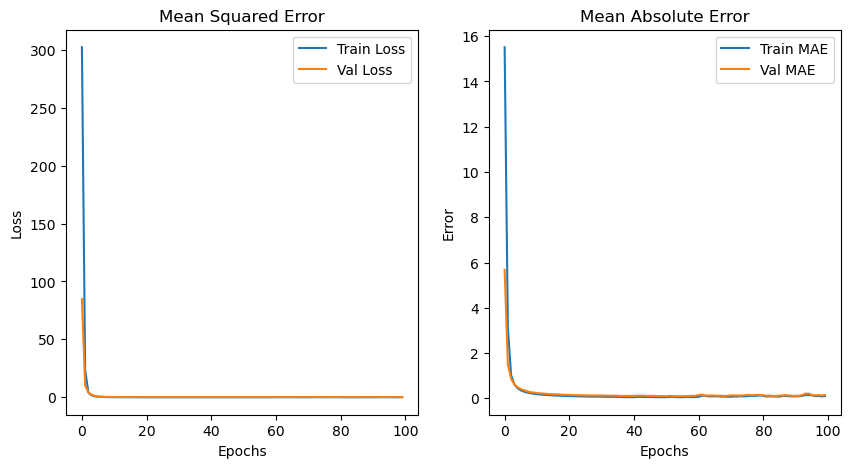

41/41 [==============================] - 0s 1ms/step - loss: 0.2232 - mean_absolute_error: 0.1523
Test Loss: 0.2231644093990326
Test MAE: 0.1523297280073166
33/33 [==============================] - 0s 1ms/step - loss: 0.1592 - mean_absolute_error: 0.1488
Validation Loss: 0.15921588242053986
Validation MAE: 0.14883317053318024
33/33 [==============================] - 0s 1ms/step
R2 Score: 0.9910253286361694


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# 데이터 로드
df = pd.read_csv('./encoded_data.csv')

# change_date 열을 제외한 나머지 열 선택
X = df.drop(columns=['change_date'])
y = df['change_date'].values  # 예측값

# 결측값 처리 (예: 평균값으로 대체) #@!
X.replace('-', np.nan, inplace=True)
X = X.astype(np.float32)
X.fillna(X.mean(), inplace=True)

y = y.astype(np.float32)

# train/test 데이터셋 나누기 (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# train 데이터셋의 일부를 다시 train(sub)/val 데이터셋으로 나누기 (80% sub(train), 20% val)
X_sub, X_val, y_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

# 스케일링 #@! 추가
scaler = StandardScaler()
X_sub = scaler.fit_transform(X_sub)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Sequential 모델 생성
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_dim=X.shape[1], activation='relu'),  # 입력계층 특성 수를 자동으로 설정
    tf.keras.layers.Dense(64, activation='relu'),  # 은닉계층1
    tf.keras.layers.Dense(32, activation='relu'),  # 은닉계층2
    tf.keras.layers.Dense(16, activation='relu'),  # 은닉계층3
    tf.keras.layers.Dense(1, activation='linear')  # 출력계층 activation linear 사용
])

# 회귀를 위한 손실 함수(mean squared error)와 메트릭스(mean absolute error) 사용하여 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# 모델 정보(요약) 확인
model.summary()

# 시드 값 설정
seed = 123
tf.random.set_seed(seed)
np.random.seed(seed)

# 모델 학습
history = model.fit(X_sub, y_sub, validation_data=(X_val, y_val), epochs=100, batch_size=100) # 수정

# 학습 결과 시각화
plt.figure(figsize=(10, 5))

# subplot 1: Mean Squared Error 손실 함수의 변화
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# subplot 2: Mean Absolute Error 매트릭스의 변화
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Val MAE')
plt.title('Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()

plt.show()

# 모델 평가 - 테스트 데이터셋 사용
loss_test, mae_test = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss_test}')
print(f'Test MAE: {mae_test}')

# 모델 평가 - 검증 데이터셋 사용
loss_val, mae_val = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss_val}')
print(f'Validation MAE: {mae_val}')

# 예측값 생성
predictions = model.predict(X_val)

# 결정계수 계산
r2 = r2_score(y_val, predictions)
print(f'R2 Score: {r2}')

In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 예측값 생성
predictions = model.predict(X_val)

# 결정계수 (R²) 계산
r2 = r2_score(y_val, predictions)
print(f"결정계수 (R²): {r2:.4f}")

# Mean Absolute Error (MAE) 계산
mae = mean_absolute_error(y_val, predictions)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Mean Absolute Percentage Error (MAPE) 계산
mape = np.mean(np.abs((y_val - predictions) / y_val)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

# Root Mean Squared Error (RMSE) 계산
rmse = np.sqrt(mean_squared_error(y_val, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Mean Bias Deviation (MBD) 계산
mbd = np.mean(predictions - y_val)
print(f"Mean Bias Deviation (MBD): {mbd:.4f}")

# Adjusted R² 계산
n = len(y_val)  # 샘플 수
p = X_val.shape[1]  # 독립 변수 수
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R²: {adjusted_r2:.4f}")

33/33 [==============================] - 0s 1ms/step
결정계수 (R²): 0.9910
Mean Absolute Error (MAE): 0.1488
Mean Absolute Percentage Error (MAPE): 21.6542%
Root Mean Squared Error (RMSE): 0.3990
Mean Bias Deviation (MBD): -0.0656
Adjusted R²: 0.9875


In [ ]:
# 33/33 [==============================] - 0s 1ms/step
# 결정계수 (R²): 0.9999
# Mean Absolute Error (MAE): 0.0267
# Mean Absolute Percentage Error (MAPE): 21.5772%
# Root Mean Squared Error (RMSE): 0.0343
# Mean Bias Deviation (MBD): 0.0165
# Adjusted R²: 0.9999